**Maximum Likelihood Estimation for omega matter (Omega_M)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

In [2]:
# Dataset
d=pd.read_excel("/content/Likelihood_1.xlsx")
#d=pd.read_excel("/content/Likelihood_2.xlsx")
d

,z,H(z),Sigma
0,0.0700,69.0,19.6
1,0.0900,69.0,12.0
2,0.1200,68.6,26.2
3,0.1700,83.0,8.0
4,0.1791,75.0,4.0
5,0.1993,75.0,5.0
6,0.2000,72.9,29.6
7,0.2700,77.0,14.0
8,0.2800,88.8,36.6
9,0.3500,82.7,8.4


In [3]:
def Hubble(z,omg_M):
  H0=67.8
  Hth=[]
  for i in z:
    t1= H0*m.sqrt((omg_M*pow((1+i),3)+(1-omg_M)))
    Hth.append(t1)
  return Hth

In [4]:
X2=[]
omg_M=[]
d_new=d.copy(deep=True)

for o_m in np.arange(0,0.8,0.0005):
  omg_M.append(o_m)

  H_th=np.array(Hubble(d["z"].to_numpy(),o_m))
  
  d_new["H_th"]=H_th
  #print(d_new)

  t2=0
  for i,j,k in zip(d_new["H(z)"],d_new["H_th"],d_new["Sigma"]):
    t2+=pow(i-j,2)/pow(k,2)
  X2.append(t2)

# Coverting to dataframe to ease further calcuations
d1=np.array([omg_M,X2]).T
df=pd.DataFrame(data=d1, columns=["omg_M","X2"])
print(df)

       omg_M         X2
0     0.0000  17.881901
1     0.0005  17.833261
2     0.0010  17.784707
3     0.0015  17.736239
4     0.0020  17.687858
...      ...        ...
1595  0.7975  18.311831
1596  0.7980  18.348141
1597  0.7985  18.384485
1598  0.7990  18.420863
1599  0.7995  18.457276

[1600 rows x 2 columns]


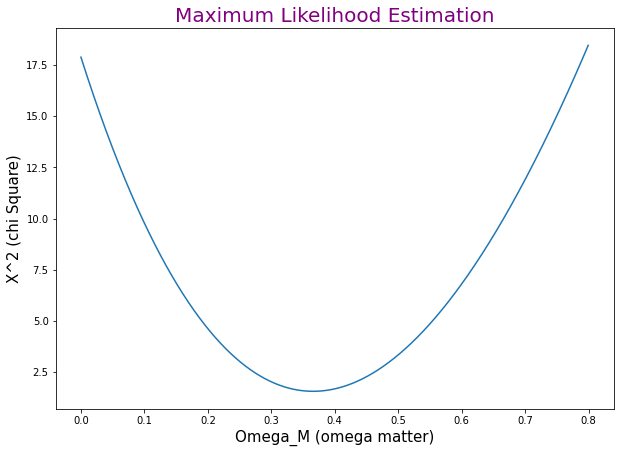

In [5]:
plt.figure(figsize=(10,7))
plt.plot(df["omg_M"],df["X2"])
plt.xlabel('Omega_M (omega matter)',size='15')
plt.ylabel('X^2 (chi Square)',size='15')
plt.title('Maximum Likelihood Estimation',color='purple',size='20')
plt.show()

In [6]:
# Conclusion
X2_min=df['X2'].min()
Omega_M=df.loc[df['X2'] == X2_min,'omg_M'].values[0]

print("Chi Square is minimum at: ", X2_min)
print("Value of Omega matter at chi Square Minimum: ", Omega_M)

Chi Square is minimum at:  1.5745359410917856
Value of Omega matter at chi Square Minimum:  0.366


In [7]:
# Finding Standard Deviation using t-score method
def variance(data):
  n = len(data)
  mean = sum(data) / n
  return sum((x - mean) ** 2 for x in data) / n

def stdev(data):
  var = variance(data)
  std_dev = m.sqrt(var)
  return std_dev

s=stdev(df["omg_M"])
sigma_1=[Omega_M+s,Omega_M-s]
sigma_2=[Omega_M+2*s,Omega_M-2*s]  #2*sigma_1
print(sigma_1)
print(sigma_2)

[0.5969400625703564, 0.1350599374296436]
[0.8278801251407129, -0.09588012514071281]


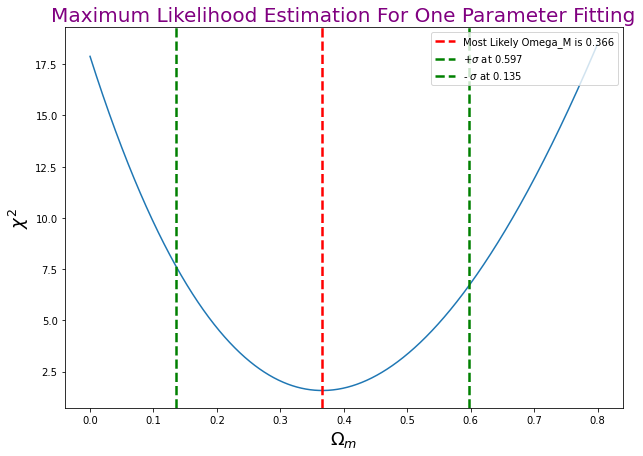

In [8]:
# Plot
plt.figure(figsize=(10,7))
plt.plot(df["omg_M"],df["X2"])
plt.xlabel(r'$\Omega_m$',size='18')
plt.ylabel(r'$\chi^{2}$',size='18')
plt.title('Maximum Likelihood Estimation For One Parameter Fitting',color='purple',size='20')

name=[r'+$\sigma$',r'- $\sigma$']
plt.axvline(x=Omega_M, linestyle='--', linewidth=2.5, label='Most Likely Omega_M is {0}'.format(round(Omega_M,3)), c='red')
for measurement, name, color in zip(sigma_1,name,["green","green"]):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name,round(measurement,3)), c=color)

plt.legend(loc="upper right")
plt.show()

For Mathematical Symbols: 
https://matplotlib.org/stable/tutorials/text/mathtext.html